IMPORT PACKAGES

In [1]:
import numpy  as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import uniform, binom

In [2]:
#What is the probability of tossing heads with a coin, if we observed 75 heads in 100 tosses?

GENERATE GRID COMPONENTS

In [3]:
num_heads = np.arange(0, 101, 1)

In [4]:
head_prob = np.arange(0, 1.01, 0.01)

COMPILE DATAFRAME

In [5]:
coin = pd.DataFrame([(x, y) for x in num_heads for y in head_prob])

In [6]:
coin.columns = ['num_heads', 'head_prob']

In [7]:
coin.head()

,num_heads,head_prob
0,0,0.00
1,0,0.01
2,0,0.02
3,0,0.03
4,0,0.04


CREATE PRIOR PROBABILITY BASELINE DATA

In [8]:
coin["prior"] = uniform.pdf(coin["head_prob"])

In [9]:
#Generate likelihood distribution using PMF
coin['likelihood'] = binom.pmf(coin['num_heads'], 100, coin['head_prob'])

In [10]:
coin["posterior_prob"] = coin["prior"] * coin["likelihood"]

In [11]:
coin["posterior_prob"] /= coin["posterior_prob"].sum()

FILTER DF FOR 75 HEADS PROB

In [12]:
heads75 = coin.loc[coin["num_heads"] == 75]

In [13]:
heads75["posterior_prob"] / heads75["posterior_prob"].sum()

7575     0.000000e+00
7576    1.905230e-127
7577    5.584306e-105
7578     6.957530e-92
7579     1.259934e-82
            ...      
7671     1.290951e-13
7672     2.113387e-16
7673     1.806231e-20
7674     1.152676e-27
7675     0.000000e+00
Name: posterior_prob, Length: 101, dtype: float64

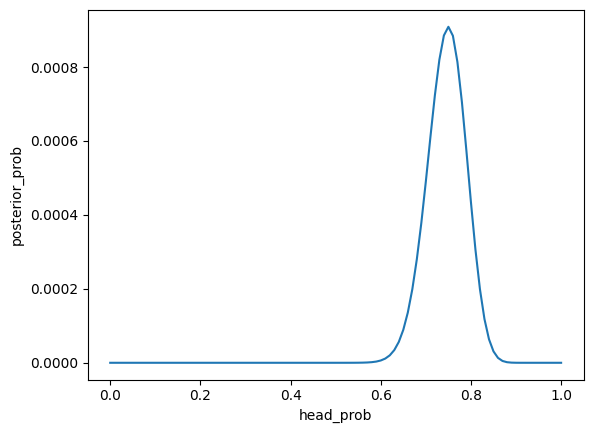

In [14]:
sns.lineplot(data = heads75, x= 'head_prob', y='posterior_prob')
plt.show()